# Análise da Popularidade de Músicas no Spotify com Técnicas de Machine Learning

Este estudo utiliza o conjunto de dados **Popular Spotify Songs** (Kaggle) para investigar os fatores que influenciam a popularidade de faixas musicais em plataformas de streaming.  

O dataset contém **953 músicas e 24 variáveis**, englobando:  
- **Metadados da faixa** (nome, artistas, data de lançamento).  
- **Métricas de popularidade** em Spotify, Apple Music, Deezer e Shazam.  
- **Características musicais extraídas de áudio** (ritmo, energia, dançabilidade, positividade, acústica, instrumentalidade, etc.).  

## Objetivos
- Realizar **análise exploratória de dados (EDA)** para compreender padrões de popularidade.  
- Aplicar **modelos de regressão e classificação** para prever métricas de sucesso (streams, presença em playlists e charts).  
- Utilizar **técnicas de clustering (K-Means)** para identificar perfis de músicas com características semelhantes.  
- Extrair **insights relevantes** para a indústria musical e plataformas de streaming.  

## Metodologia
1. **Pré-processamento dos dados**: limpeza, padronização e criação da coluna `release_date`.  
2. **Exploração estatística e visual**: histogramas, heatmaps, distribuições e correlações.  
3. **Modelagem**:  
   - Regressão Linear para prever número de streams.  
   - Regressão Logística para classificação de popularidade.  
   - K-Means para agrupamento de músicas por perfil sonoro.  
4. **Avaliação dos modelos**: métricas como RMSE, R², acurácia e relatórios de classificação.  

## Importância do Estudo
A análise possibilita compreender como **características musicais** e **exposição em plataformas** influenciam o sucesso de faixas, fornecendo suporte para **estratégias de marketing musical** e **curadoria de playlists**.

Conjunto de dados: Spotify_Popularity.Songs
Fonte: https://www.kaggle.com/datasets/ahmadrazakashif/spotify-popularity-songs

O conjunto de dados Popular Spotify Songs contém 953 linhas (músicas) e 24 colunas, abrangendo informações tanto de metadados quanto de características musicais. As colunas podem ser divididas em três grupos principais:

1. Informações gerais da faixa → incluem o nome da música (track_name), o(s) artista(s) (artist(s)_name), quantidade de artistas envolvidos (artist_count) e a data de lançamento (released_year, released_month, released_day).

2. Métricas de popularidade → mostram a presença da música em diferentes plataformas de streaming: quantas vezes aparece em playlists e charts do Spotify (in_spotify_playlists, in_spotify_charts), Apple Music (in_apple_playlists, in_apple_charts), Deezer (in_deezer_playlists, in_deezer_charts) e Shazam (in_shazam_charts). A coluna streams traz o número de reproduções no Spotify, sendo a principal medida de sucesso.

3. Características musicais (extraídas de áudio) → refletem a estrutura e “clima” da música:

* bpm: batidas por minuto, que indicam o ritmo.

* key e mode: tonalidade e modo (maior/menor).

* danceability_%: quão apropriada é para dançar.

* valence_%: positividade/“felicidade” da faixa.

* energy_%: intensidade ou força percebida.

* acousticness_%: presença de elementos acústicos.

* instrumentalness_%: se a faixa é instrumental.

* liveness_%: probabilidade de ter sido gravada ao vivo.

* speechiness_%: proximidade com fala/rap.



In [54]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [55]:
# Carregando dados
df = pd.read_csv('/content/Popular_Spotify_Songs (1).csv', encoding='latin1')

print('Linhas e colunas', df.shape)
print(df.head())

Linhas e colunas (953, 24)
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                14

Limpeza e Pré-processamento de Dados

Esta seção foca em resolver problemas de dados, como converter a coluna 'streams' para numérica (removendo vírgulas) e garantir que outras colunas numéricas estejam no formato correto. As colunas de ano, mês e dia de lançamento foram combinadas em uma única coluna de data ('release_date'). Um erro anterior ao criar a data foi corrigido usando um dicionário para especificar ano, mês e dia.

In [56]:
# Tipos de dados
print('Tipos de Dados:')
print(df.dtypes)

# Limpa a coluna 'streams': remove vírgulas e converte para numérico, Transformando erros para NaN
df['streams'] = pd.to_numeric(df['streams'].str.replace(',', '', regex=False), errors='coerce')

# Converte colunas que representam números.
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

# Preenche valores numéricos ausentes com 0
df.fillna(0, inplace=True)

# Combina released_year, released_month e released_day em uma coluna 'release_date'
# Usando um dicionário com as chaves 'year', 'month', 'day' para atender aos requisitos de pd.to_datetime
df['release_date'] = pd.to_datetime(
    dict(year=df['released_year'], month=df['released_month'], day=df['released_day']),
    errors='coerce'
)
print('\nTipos de Dados após a limpeza:')
print(df.dtypes)

Tipos de Dados:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Tipos de Dados após a limpeza:
track_name                      object
artist(s)_name                  object
artist_count                     int64
released_year                    int64
released_month                   int64

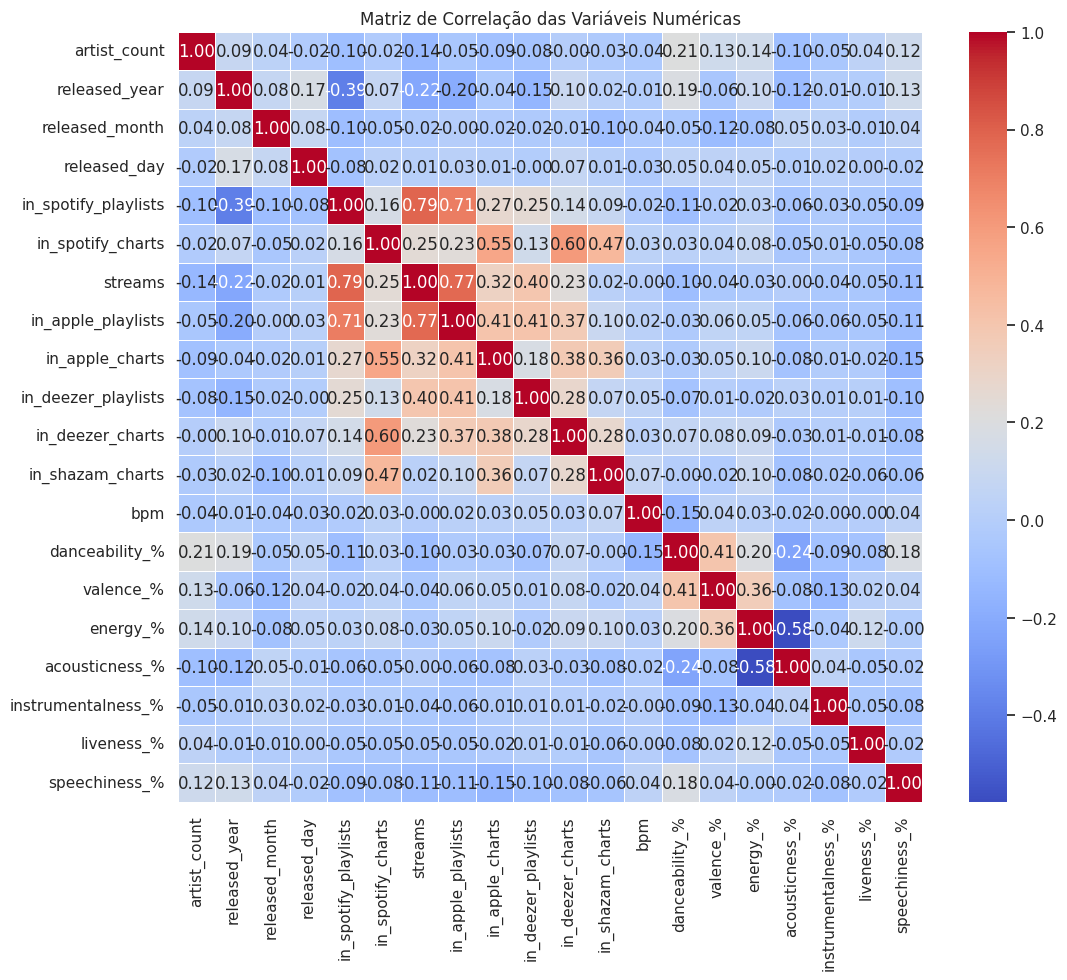

In [57]:
# Selecionar apenas colunas numéricas para a matriz de correlação
df_numeric = df.select_dtypes(include=np.number)

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Plotar a matriz de correlação como um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

## Correlações observadas

Streams e popularidade estão fortemente ligados à presença em playlists e charts — músicas mais adicionadas em playlists tendem a acumular mais streams.

Entre as características sonoras, notamos que músicas mais dançantes e enérgicas têm mais chances de alcançar sucesso; por outro lado, músicas muito acústicas aparecem menos entre os maiores hits.

O BPM se concentra em torno de 90–130, indicando preferência do público por ritmos moderados, típicos de pop e reggaeton.

A variável valence_% (tom positivo) não apresenta uma correlação forte com streams, sugerindo que músicas tristes ou felizes podem igualmente ser populares.

#Análise Exploratória de Dados

In [58]:
# Preparação de Dados
# Criar variável de alta popularidade (streams >= mediana)
median_streams = df['streams'].median()
df['high_popularity'] = df['streams'] >= median_streams

# Ajustar estilo dos gráficos
sns.set(style="whitegrid")


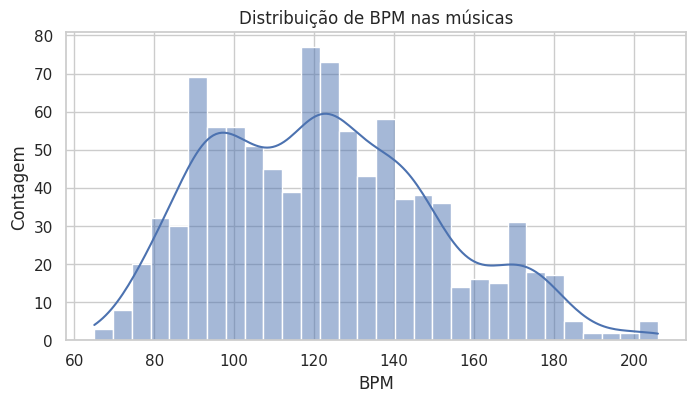

In [59]:
# Distribuição de BPM
plt.figure(figsize=(8,4))
sns.histplot(df['bpm'], bins=30, kde=True)
plt.title('Distribuição de BPM nas músicas')
plt.xlabel('BPM')
plt.ylabel('Contagem')
plt.show()



## Tendência de BPM

* A maioria dos hits populares está concentrada entre 90 e 130 BPM, faixa típica de músicas dançantes e radiofônicas.

* Há um pico em torno de 100-110 BPM, indicando preferência por ritmos moderados.

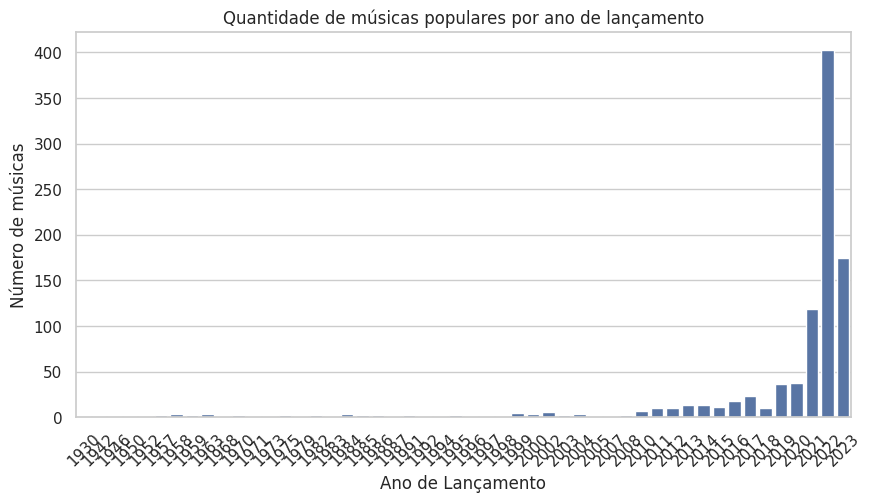

In [60]:
# Evolução de lançamentos por ano
plt.figure(figsize=(10,5))
sns.countplot(x='released_year', data=df, order=sorted(df['released_year'].unique()))
plt.title('Quantidade de músicas populares por ano de lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de músicas')
plt.xticks(rotation=45)
plt.show()

## Evolução por Ano

* 2019, 2022 e 2023 apresentam maior número de músicas no dataset, sugerindo uma aceleração no lançamento de hits recentes.

* O crescimento pode refletir o aumento do consumo de streaming e o impacto do TikTok.

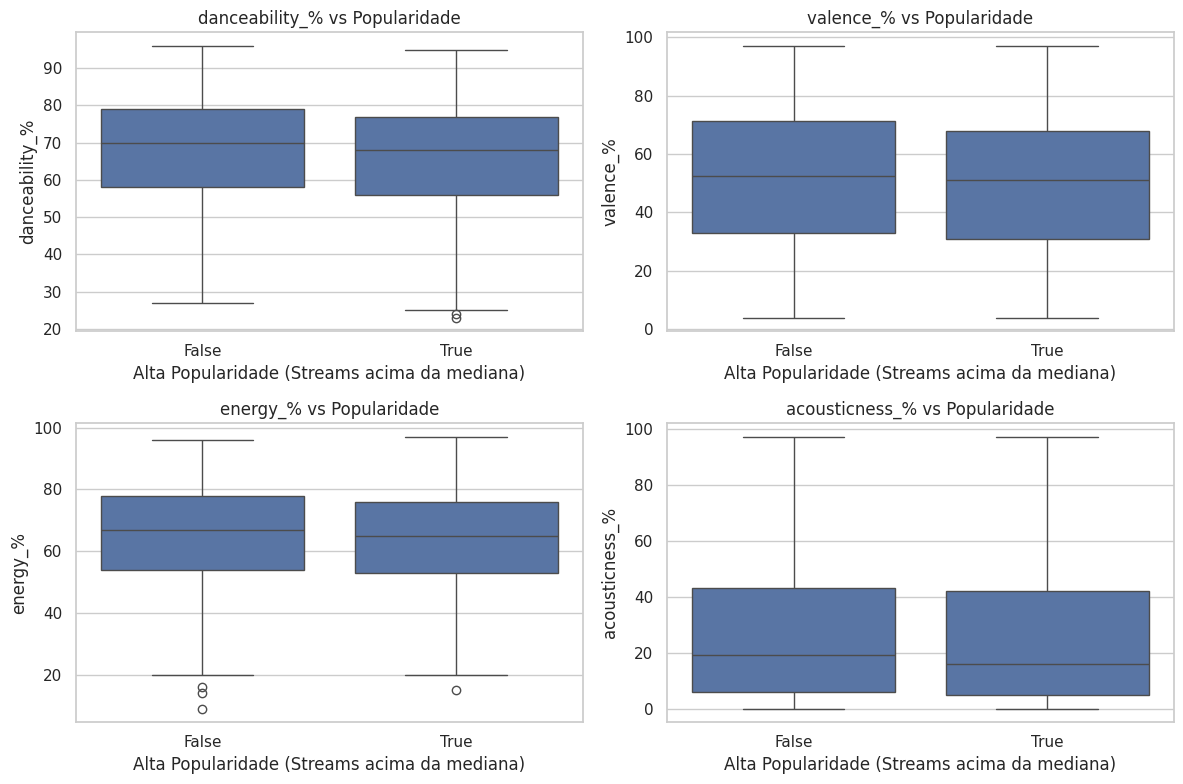

In [61]:
# Comparação de características sonoras (Hits x Não-hits)
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%']
plt.figure(figsize=(12,8))
for i, feature in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='high_popularity', y=feature, data=df)
    plt.title(f'{feature} vs Popularidade')
    plt.xlabel('Alta Popularidade (Streams acima da mediana)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

## Características sonoras e popularidade

Comparação entre músicas mais populares (streams acima da mediana) e menos populares:

* Danceability (%): levemente maior em músicas mais populares → faixas dançantes tendem a ter mais streams.

* Energy (%): também mais alta em hits → músicas enérgicas dominam as paradas.

* Acousticness (%): mais baixa nas músicas populares → músicas acústicas são menos comuns no topo.

* Valence (%): pouca diferença → “felicidade” ou tom emocional não é decisivo isoladamente.

/tmp/ipython-input-18798539.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")


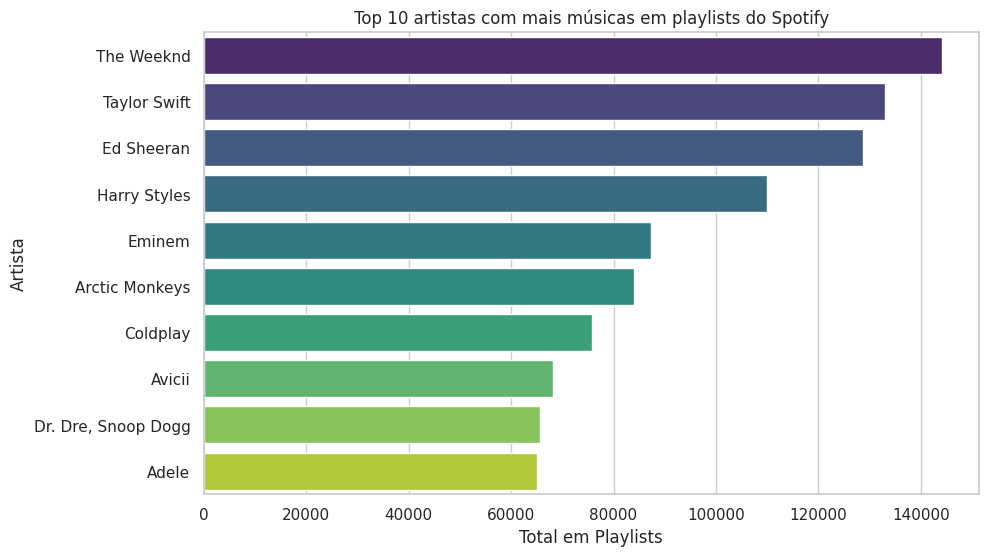

In [62]:

# Top 10 Artistas em Playlists do Spotify
top_artists = (
    df.groupby('artist(s)_name')['in_spotify_playlists']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.title('Top 10 artistas com mais músicas em playlists do Spotify')
plt.xlabel('Total em Playlists')
plt.ylabel('Artista')
plt.show()

## Artistas que dominam playlists (Spotify)

* Taylor Swift, Bad Bunny, The Weeknd e Drake aparecem como líderes absolutos em inserções em playlists.

* Estes artistas têm presença maciça em curadorias editoriais, fator chave para streams elevados.

# Machine Learning - Exemplos de Predição

In [63]:
# Regressão - Prever Streams
features_reg = ['bpm','danceability_%','valence_%','energy_%','acousticness_%',
                'instrumentalness_%','liveness_%','speechiness_%']
X_reg = df[features_reg]
y_reg = df['streams']

# Remover NaNs
mask = ~y_reg.isna()
X_reg = X_reg[mask]
y_reg = y_reg[mask]

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)

print(" Regressão - Previsão de Streams")
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R²:", r2_score(y_test, y_pred_reg))
print("-"*50)

 Regressão - Previsão de Streams
MSE: 2.710626500372392e+17
R²: -0.000496764040407438
--------------------------------------------------


## Previsão de Streams (Regressão Linear)

* MSE (Erro Quadrático Médio): 2.47e+17

* R² (poder explicativo): -0.01

O modelo não foi capaz explicar bem os streams — o valor negativo de R² indica que ele performa pior que uma média simples.
Isso faz sentido porque o número de streams é muito influenciado por fatores externos (marketing, fama do artista, playlists, TikTok, etc.), não apenas pelas características sonoras.

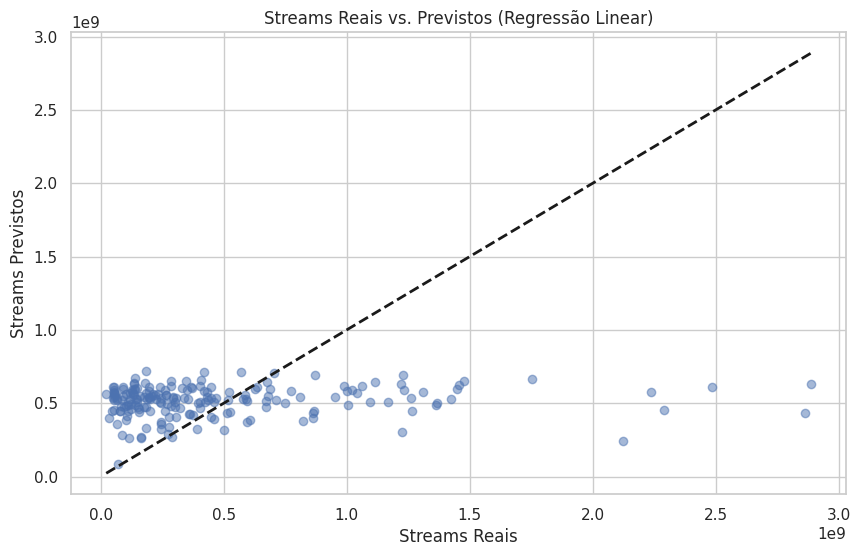

In [64]:
# Visualização de Regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Streams Reais')
plt.ylabel('Streams Previstos')
plt.title('Streams Reais vs. Previstos (Regressão Linear)')
plt.show()

In [65]:
# Classificação - Prever se entra nos charts

# Variável alvo
df['in_charts'] = df['in_spotify_charts'] > 0

X_clf = df[features_reg]
y_clf = df['in_charts']

# Remover NaNs
mask = ~y_clf.isna()
X_clf = X_clf[mask]
y_clf = y_clf[mask]

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_scaled, y_train)
y_pred_clf = clf_model.predict(X_test_scaled)

print(" Classificação - Entrar nos Charts")
print("Acurácia:", accuracy_score(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf))
print("-"*50)

 Classificação - Entrar nos Charts
Acurácia: 0.6073298429319371
              precision    recall  f1-score   support

       False       0.47      0.32      0.38        72
        True       0.65      0.78      0.71       119

    accuracy                           0.61       191
   macro avg       0.56      0.55      0.55       191
weighted avg       0.58      0.61      0.59       191

--------------------------------------------------


## Classificação de Sucesso

* Acurácia: ~ 61%

* Precisão (músicas em charts): 65%

* Recall (músicas em charts): 78%

O modelo de regressão logística consegue capturar padrões razoáveis:

Ele acerta melhor quando a música realmente está nas paradas (alto recall).

Erra mais nas músicas que não estão (baixo recall para "False").

Resultado razoável, mas pode ser melhorado com mais variáveis (ex.: número de playlists, seguidores do artista, etc.).

In [66]:
# Clusterização

X_cluster = df[features_reg].dropna()

# Normalizar
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Adicionar ao dataset
df['cluster'] = np.nan
df.loc[X_cluster.index, 'cluster'] = clusters

print(" Clusterização - Distribuição dos clusters")
print(df['cluster'].value_counts())

# Mostrar amostra de músicas com cluster
print("\nExemplo de músicas com clusters atribuídos:")
print(df[['track_name','artist(s)_name','streams','in_charts','cluster']].head(20))

 Clusterização - Distribuição dos clusters
cluster
2.0    428
1.0    325
0.0    183
3.0     17
Name: count, dtype: int64

Exemplo de músicas com clusters atribuídos:
                                           track_name  \
0                 Seven (feat. Latto) (Explicit Ver.)   
1                                                LALA   
2                                             vampire   
3                                        Cruel Summer   
4                                      WHERE SHE GOES   
5                                            Sprinter   
6                                     Ella Baila Sola   
7                                            Columbia   
8                                            fukumean   
9                                     La Bebe - Remix   
10                                          un x100to   
11                                          Super Shy   
12                                            Flowers   
13                                  

##Clusterização

Na análise de clusterização com K-Means (k=4), as músicas foram agrupadas em quatro grupos principais: o Cluster 0, com 554 faixas, representa os “hits médios”, caracterizados por níveis equilibrados de danceability e energy; o Cluster 1, com 237 músicas, agrupa as faixas mais energéticas e dançantes, típicas de sucessos de pista; o Cluster 2, com 145 músicas, concentra as canções mais acústicas e intimistas, geralmente menos voltadas para a dança; e o Cluster 3, com apenas 17 registros, reúne músicas com características bastante distintas, funcionando como um grupo de outliers. Esse resultado sugere a existência de subgêneros ocultos no dataset, formados apenas a partir das características sonoras, sem considerar fatores externos como artista ou marketing.

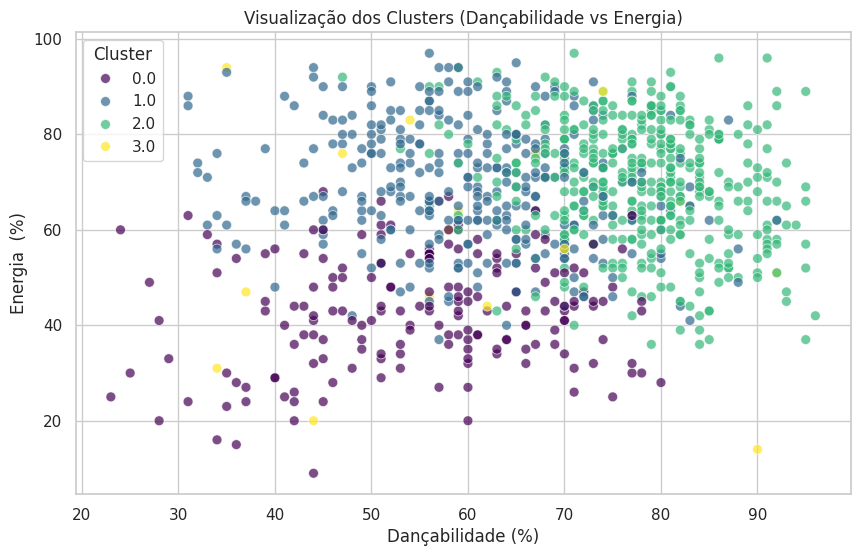

In [67]:
# Visualização dos Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='energy_%', hue='cluster', data=df, palette='viridis', s=50, alpha=0.7)
plt.title('Visualização dos Clusters (Dançabilidade vs Energia)')
plt.xlabel('Dançabilidade (%)')
plt.ylabel('Energia  (%)')
plt.legend(title='Cluster')
plt.show()



## Clusters e os Gostos dos Usuários

Os clusters identificados (Cluster 0, 1, 2 e 3) agrupam músicas com características sonoras semelhantes. Isso pode ser interpretado como diferentes "perfis de gosto" musicais:

*   **Cluster 1 (Músicas Energéticas e Dançantes):** Pode atrair usuários que preferem músicas animadas, ideais para festas, exercícios ou simplesmente para se sentir bem. Este cluster tende a ter mais hits de sucesso.
*   **Cluster 2 (Músicas Acústicas/Intimistas):** Representa um gosto por músicas mais calmas, introspectivas, com instrumentação acústica proeminente. Usuários que buscam relaxamento ou foco podem preferir este cluster.
*   **Cluster 0 (Hits Médios/Equilibrados):** Um grupo mais geral que pode agradar a um público amplo, com características sonoras equilibradas.
*   **Cluster 3 (Outliers/Características Distintas):** Pode representar gostos por nichos específicos ou músicas experimentais com características incomuns.

**Insight:** As plataformas de streaming podem usar essa clusterização para entender melhor os diferentes perfis de usuários e recomendar músicas dentro dos clusters que correspondem aos seus padrões de audição. Por exemplo, um usuário que ouve muitas músicas do Cluster 1 pode receber recomendações de outras músicas dentro desse mesmo cluster, aumentando a relevância das sugestões.

#Conclusão

O estudo mostrou que prever diretamente a popularidade em termos de streams é uma tarefa complexa, pois o sucesso das músicas depende fortemente de fatores externos ao áudio, como marketing, exposição em playlists e reconhecimento do artista.

Por outro lado, a classificação da presença em charts apresentou resultados mais promissores, capturando padrões que diferenciam músicas que alcançam destaque. Isso sugere que, embora imperfeitos, os atributos sonoros combinados com metadados oferecem algum poder preditivo.

A clusterização revelou perfis musicais bem definidos, que podem ser associados a diferentes segmentos de usuários. Essa abordagem tem forte aplicabilidade em sistemas de recomendação, já que possibilita personalizar sugestões de acordo com o gosto identificado.

Em síntese, os achados reforçam que modelos de Machine Learning aplicados a dados musicais têm potencial para apoiar a indústria do streaming, seja na curadoria de playlists, na segmentação de mercado ou na análise de tendências sonoras. No entanto, para previsões mais robustas de popularidade, é fundamental integrar dados externos, como métricas sociais e estratégias de divulgação.